<a href="https://colab.research.google.com/github/parulnith/Explainable-AI-Workshop/blob/main/scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install h2o -q


     |████████████████████████████████| 176.2 MB 74 kB/s 


In [2]:
SEED = 12345 # global random seed for better reproducibility

In [3]:
import h2o
from h2o.estimators import H2OXGBoostEstimator
import numpy as np   # array, vector, matrix calculations
import pandas as pd  # DataFrame handling

import matplotlib.pyplot as plt # general plotting
pd.options.display.max_columns = 999 # enable display of all columns in notebook

# display plots in-notebook
%matplotlib inline   

h2o.init(max_mem_size='4G')      # start h2o
h2o.remove_all()                 # remove any existing data structures from h2o memory

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmph0kzws_x
  JVM stdout: /tmp/tmph0kzws_x/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmph0kzws_x/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,"7 days, 16 hours and 38 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_wbqqsw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
data = h2o.import_file('/content/data.csv')
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


ID,LIMIT_BAL,SEX,RACE,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DELINQ_NEXT
1,20000,2,1,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,3,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,4,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,3,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,4,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,4,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,4,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,4,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [11]:
data.describe()

Rows:30000
Cols:26




,ID,LIMIT_BAL,SEX,RACE,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DELINQ_NEXT
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1.0,10000.0,1.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15000.5,167484.32266666656,1.603733333333334,2.7219666666666646,1.8531333333333333,1.5518666666666656,35.485499999999966,-0.016699999999999927,-0.1337666666666665,-0.16619999999999996,-0.22066666666666673,-0.26619999999999994,-0.2911,51223.33089999997,49179.07516666663,47013.15480000005,43262.94896666666,40311.4009666667,38871.760400000014,5663.5805,5921.163500000005,5225.681500000004,4826.076866666662,4799.387633333334,5215.502566666668,0.2212
maxs,30000.0,1000000.0,2.0,4.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0
sigma,8660.398374208891,129747.66156720239,0.48912919609026045,1.094396662865319,0.7903486597207292,0.5219696006132486,9.217904068090185,1.123801527997335,1.1971859730345527,1.1968675684465737,1.169138622402337,1.1331874060027483,1.1499876256079027,73635.86057552956,71173.76878252838,69349.38742703681,64332.85613391633,60797.155770264864,59554.10753674573,16563.280354025774,23040.87040205723,17606.961469803096,15666.159744032007,15278.305679144793,17777.465775435307,0.41506180569093337
zeros,0,0,0,0,14,54,0,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,20000.0,2.0,1.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,3.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


<Figure size 1440x720 with 0 Axes>

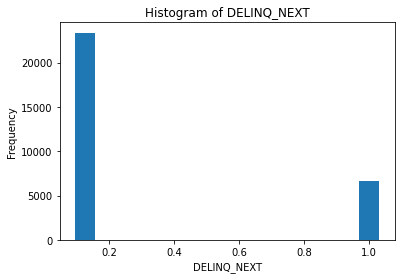

breaks,counts,mids_true,mids,widths
0.0625,nan,nan,nan,nan
0.125,23364,0,0.09375,0.0625
0.1875,0,0,0.15625,0.0625
0.25,0,0,0.21875,0.0625
0.3125,0,0,0.28125,0.0625
0.375,0,0,0.34375,0.0625
0.4375,0,0,0.40625,0.0625
0.5,0,0,0.46875,0.0625
0.5625,0,0,0.53125,0.0625
0.625,0,0,0.59375,0.0625


In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
data['DELINQ_NEXT'].hist()


In [5]:
id_col = 'ID'
groups = ['SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'DELINQ_NEXT'

In [6]:
data[target] = data[target].asfactor()

In [7]:
train, valid, test = data.split_frame(ratios=[0.8,0.1])
print(train.shape)
print(valid.shape)
print(test.shape)

(24057, 26)
(2971, 26)
(2972, 26)


In [8]:
# assign target and inputs for GBM
features = [col for col in data.col_names if col not in groups + [id_col, target]]

In [9]:
print(features)
print(target)

['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
DELINQ_NEXT


In [13]:
param = {
      "ntrees" : 100
    , "max_depth" : 10
    , "learn_rate" : 0.1
    , "sample_rate" : 0.9
    , "col_sample_rate_per_tree" : 1
    , "min_rows" : 5
    , "seed": SEED
    , "score_tree_interval": 10
}

In [14]:
xgb_clf = H2OXGBoostEstimator(**param)

In [15]:
xgb_clf.train(x = features, y = target, training_frame = train, validation_frame = valid)

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1645580119894_1


Model Summary: 


,,number_of_trees
0,,100.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08721514433190958
RMSE: 0.2953221026809703
LogLoss: 0.2942068767490054
Mean Per-Class Error: 0.1503299681260604
AUC: 0.9381343429757921
AUCPR: 0.8371788360151211
Gini: 0.8762686859515842

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2784038106115853: 


,,0,1,Error,Rate
0,0,16773.0,1889.0,0.1012,(1889.0/18662.0)
1,1,1065.0,4275.0,0.1994,(1065.0/5340.0)
2,Total,17838.0,6164.0,0.1231,(2954.0/24002.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.278404,0.743220,216.0
1,max f2,0.188811,0.823241,263.0
2,max f0point5,0.467872,0.770876,147.0
3,max accuracy,0.368900,0.885051,180.0
4,max precision,0.967660,1.000000,0.0
5,max recall,0.049023,1.000000,369.0
6,max specificity,0.967660,1.000000,0.0
7,max absolute_mcc,0.278404,0.665785,216.0
8,max min_per_class_accuracy,0.235852,0.861610,237.0
9,max mean_per_class_accuracy,0.217035,0.866320,247.0



Gains/Lift Table: Avg response rate: 22.25 %, avg score: 22.28 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010041,0.891000,4.476106,4.476106,0.995851,0.920529,0.995851,0.920529,0.044944,0.044944,347.610611,347.610611,0.044890
1,2,0.020040,0.856562,4.494757,4.485412,1.000000,0.871911,0.997921,0.896271,0.044944,0.089888,349.475655,348.541195,0.089834
2,3,0.030039,0.830726,4.476028,4.482288,0.995833,0.842277,0.997226,0.878298,0.044757,0.134644,347.602840,348.228844,0.134537
3,4,0.040038,0.803847,4.419844,4.466694,0.983333,0.817562,0.993757,0.863130,0.044195,0.178839,341.984395,346.669356,0.178517
4,5,0.050037,0.777355,4.401116,4.453589,0.979167,0.791186,0.990841,0.848753,0.044007,0.222846,340.111579,345.358893,0.222257
5,6,0.100033,0.609296,3.951640,4.202719,0.879167,0.697966,0.935027,0.773391,0.197566,0.420412,295.164014,320.271906,0.412053
6,7,0.150029,0.455575,2.977776,3.794518,0.662500,0.529095,0.844210,0.691982,0.148876,0.569288,197.777622,279.451817,0.539227
7,8,0.200025,0.353563,2.404695,3.447135,0.535000,0.397212,0.766924,0.618305,0.120225,0.689513,140.469476,244.713469,0.629552
8,9,0.300017,0.234202,1.739845,2.878117,0.387083,0.288364,0.640328,0.508340,0.173970,0.863483,73.984535,187.811727,0.724698
9,10,0.400008,0.168993,0.820293,2.363715,0.182500,0.198773,0.525883,0.430956,0.082022,0.945506,-17.970693,136.371480,0.701587




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1369338368030983
RMSE: 0.37004572258451834
LogLoss: 0.4342022537109975
Mean Per-Class Error: 0.29149750672606384
AUC: 0.7715184028591175
AUCPR: 0.5273812802229924
Gini: 0.5430368057182351

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27053210139274597: 


,,0,1,Error,Rate
0,0,1978.0,395.0,0.1665,(395.0/2373.0)
1,1,272.0,381.0,0.4165,(272.0/653.0)
2,Total,2250.0,776.0,0.2204,(667.0/3026.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.270532,0.533240,208.0
1,max f2,0.090490,0.628614,330.0
2,max f0point5,0.369982,0.545421,166.0
3,max accuracy,0.553100,0.815268,107.0
4,max precision,0.967053,1.000000,0.0
5,max recall,0.022483,1.000000,389.0
6,max specificity,0.967053,1.000000,0.0
7,max absolute_mcc,0.369982,0.396233,166.0
8,max min_per_class_accuracy,0.175851,0.693637,262.0
9,max mean_per_class_accuracy,0.258881,0.708595,214.0



Gains/Lift Table: Avg response rate: 21.58 %, avg score: 21.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010245,0.874869,3.886578,3.886578,0.838710,0.916798,0.838710,0.916798,0.039816,0.039816,288.657808,288.657808,0.037709
1,2,0.020159,0.836431,3.398264,3.646424,0.733333,0.852651,0.786885,0.885250,0.033691,0.073507,239.826442,264.642382,0.068029
2,3,0.030073,0.794476,2.934865,3.411844,0.633333,0.815052,0.736264,0.862108,0.029096,0.102603,193.486473,241.184390,0.092490
3,4,0.040317,0.756358,3.438127,3.418522,0.741935,0.775987,0.737705,0.840225,0.035222,0.137825,243.812676,241.852233,0.124340
4,5,0.050231,0.724231,3.243798,3.384037,0.700000,0.741225,0.730263,0.820685,0.032159,0.169985,224.379786,238.403724,0.152707
5,6,0.100132,0.545653,2.669919,3.028156,0.576159,0.634777,0.653465,0.728038,0.133231,0.303216,166.991877,202.815641,0.258968
6,7,0.150033,0.412599,2.025456,2.694659,0.437086,0.479368,0.581498,0.645330,0.101072,0.404288,102.545561,169.465901,0.324220
7,8,0.200595,0.333963,1.817254,2.473501,0.392157,0.367220,0.533773,0.575230,0.091884,0.496172,81.725370,147.350084,0.376913
8,9,0.300066,0.231613,1.231627,2.061822,0.265781,0.276809,0.444934,0.476304,0.122511,0.618683,23.162709,106.182243,0.406294
9,10,0.400198,0.171579,0.856448,1.760230,0.184818,0.197548,0.379851,0.406558,0.085758,0.704441,-14.355172,76.023005,0.387964




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-23 01:39:18,0.213 sec,0.0,0.500000,0.693147,0.500000,0.222481,1.000000,0.777519,0.500000,0.693147,0.500000,0.215796,1.000000,0.784204
1,,2022-02-23 01:39:20,1.738 sec,10.0,0.368952,0.447596,0.848515,0.688310,4.345553,0.177944,0.386485,0.476633,0.775876,0.536981,3.886578,0.229015
2,,2022-02-23 01:39:21,3.091 sec,20.0,0.336759,0.379522,0.876703,0.728011,4.401504,0.175027,0.370003,0.437162,0.776904,0.537155,3.886578,0.217779
3,,2022-02-23 01:39:23,4.456 sec,30.0,0.325746,0.352797,0.890726,0.749996,4.438805,0.166986,0.368079,0.430027,0.777018,0.537796,4.185546,0.209518
4,,2022-02-23 01:39:24,5.741 sec,40.0,0.318861,0.337450,0.902201,0.769964,4.476106,0.149946,0.367695,0.428741,0.776377,0.537122,4.185546,0.206874
5,,2022-02-23 01:39:25,6.837 sec,50.0,0.313596,0.327006,0.910865,0.785712,4.476106,0.147363,0.368376,0.430020,0.774672,0.535102,4.185546,0.219762
6,,2022-02-23 01:39:26,7.978 sec,60.0,0.309851,0.319869,0.917476,0.797268,4.476106,0.144821,0.368474,0.430365,0.774049,0.534583,4.036062,0.207204
7,,2022-02-23 01:39:27,9.097 sec,70.0,0.305268,0.311460,0.924345,0.810384,4.476106,0.133781,0.369159,0.431925,0.772527,0.531818,4.185546,0.207865
8,,2022-02-23 01:39:28,10.100 sec,80.0,0.301691,0.304980,0.929745,0.820131,4.476106,0.138947,0.369472,0.432871,0.771683,0.529544,4.185546,0.220423
9,,2022-02-23 01:39:29,11.170 sec,90.0,0.298309,0.299202,0.934267,0.829456,4.476106,0.131781,0.369985,0.434070,0.771218,0.527380,4.036062,0.223728



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PAY_0,15061.762695,1.000000,0.271542
1,BILL_AMT1,3653.729736,0.242583,0.065871
2,PAY_AMT3,3181.316895,0.211218,0.057355
3,LIMIT_BAL,3036.952148,0.201633,0.054752
4,PAY_AMT2,3013.167969,0.200054,0.054323
5,PAY_AMT1,2907.437988,0.193034,0.052417
6,PAY_AMT4,2693.182129,0.178809,0.048554
7,PAY_AMT6,2682.215576,0.178081,0.048356
8,BILL_AMT2,2634.780518,0.174932,0.047501
9,PAY_2,2568.857666,0.170555,0.046313


In [16]:
xgb_clf.model_performance(valid=True).auc()

0.7715184028591175

In [19]:
perf_train = xgb_clf.model_performance(train=True)
perf_valid = xgb_clf.model_performance(valid=True)

In [20]:
perf_valid.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27053210139274597: 


,,0,1,Error,Rate
0,0,1978.0,395.0,0.1665,(395.0/2373.0)
1,1,272.0,381.0,0.4165,(272.0/653.0)
2,Total,2250.0,776.0,0.2204,(667.0/3026.0)


In [ ]:
x = perf_train.plot(type = 'roc')
y = perf_valid.plot(type = 'roc');


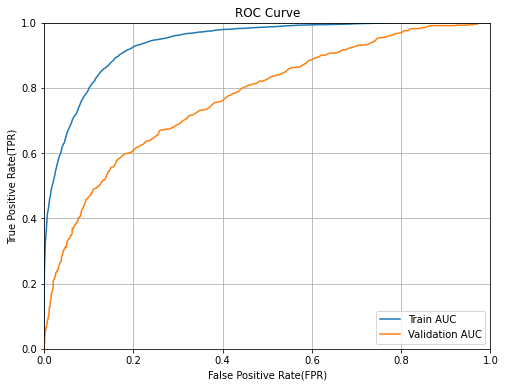

In [23]:

plt.figure(figsize=(8,6))
plt.plot(x[0],x[1],label='Train AUC')
plt.plot(y[0],y[1],label='Validation AUC')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.grid()



In [22]:
xgb_clf.download_mojo("xgb_baseline.zip", get_genmodel_jar=True)

'/content/xgb_baseline.zip/XGBoost_model_python_1645580119894_1.zip'

In [10]:
## Finding the best  model using Grid Search
from h2o.grid.grid_search import H2OGridSearch

In [11]:
def xgb_grid(x, y, training_frame, validation_frame, seed_, weight=None):
    """
    :param x: List of inputs.
    :param y: Name of target variable.
    :param training_frame: Training H2OFrame.
    :param validation_frame: Validation H2OFrame.
    :param seed_: Random seed for better reproducibility.
    :return: Best H2OGeneralizedLinearEstimator.
    """

    #Settings GLM grid parameters
    hyper_parameters = {'reg_lambda': [0.01, 0.25, 0.5, 0.99],
                        'min_child_weight': [1, 5, 10],
                      
                        'subsample': [0.6, 0.8, 1.0],
                        'colsample_bytree': [0.6, 0.8, 1.0],
                        'max_depth': [3, 4, 5]}
                                        


    # initialize cartesian grid search
    xgb_grid = H2OGridSearch(model = H2OXGBoostEstimator,
                                      hyper_params=hyper_parameters,
                                      parallelism = 3)

    # training w/ grid search
    xgb_grid.train(y=y,
               x=x,
               training_frame=training_frame,
               validation_frame=validation_frame,
               weights_column=weight,
               seed=seed_)

    # select best model from grid search
    best_model = xgb_grid.get_grid()[0]
    del xgb_grid

    return best_model

In [12]:
best_xgb = xgb_grid(x=features, y=target, training_frame=train,
                         validation_frame= valid, seed_=SEED)


xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%


In [13]:
best_xgb.download_mojo("xgb_best.zip", get_genmodel_jar=True)

'/content/xgb_best.zip/XGBoost_model_1645698586808_10978.zip'

In [15]:
best_xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_1645698586808_10978


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1284823617163602
RMSE: 0.35844436348805964
LogLoss: 0.4101149315508032
Mean Per-Class Error: 0.2745179911246236
AUC: 0.8104202215568675
AUCPR: 0.6001429034641073
Gini: 0.6208404431137351

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2710433243488779: 


,,0,1,Error,Rate
0,0,16140.0,2581.0,0.1379,(2581.0/18721.0)
1,1,2194.0,3142.0,0.4112,(2194.0/5336.0)
2,Total,18334.0,5723.0,0.1985,(4775.0/24057.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.271043,0.568225,215.0
1,max f2,0.149773,0.664458,293.0
2,max f0point5,0.473166,0.600208,136.0
3,max accuracy,0.473166,0.826495,136.0
4,max precision,0.921533,1.000000,0.0
5,max recall,0.032203,1.000000,391.0
6,max specificity,0.921533,1.000000,0.0
7,max absolute_mcc,0.296541,0.443626,203.0
8,max min_per_class_accuracy,0.190276,0.730303,263.0
9,max mean_per_class_accuracy,0.208197,0.732084,252.0



Gains/Lift Table: Avg response rate: 22.18 %, avg score: 22.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010018,0.829669,4.022046,4.022046,0.892116,0.854829,0.892116,0.854829,0.040292,0.040292,302.204629,302.204629,0.038904
1,2,0.020036,0.798855,3.947218,3.984632,0.875519,0.814646,0.883817,0.834738,0.039543,0.079835,294.721752,298.463191,0.076844
2,3,0.030012,0.772482,3.306184,3.759109,0.733333,0.784791,0.833795,0.818135,0.032984,0.112819,230.618441,275.910919,0.106409
3,4,0.040030,0.741901,3.610488,3.721915,0.800830,0.757271,0.825545,0.802903,0.036169,0.148988,261.048807,272.191533,0.140014
4,5,0.050006,0.710675,3.400110,3.657715,0.754167,0.726284,0.811305,0.787618,0.033921,0.182909,240.011010,265.771478,0.170783
5,6,0.100012,0.568631,2.934417,3.296066,0.650873,0.642581,0.731089,0.715099,0.146739,0.329648,193.441668,229.606573,0.295088
6,7,0.150019,0.394231,2.229857,2.940663,0.494597,0.473447,0.652258,0.634549,0.111507,0.441154,122.985686,194.066277,0.374117
7,8,0.200025,0.318137,1.757652,2.644910,0.389859,0.350896,0.586658,0.563635,0.087894,0.529048,75.765188,164.491005,0.422804
8,9,0.299996,0.226155,1.295354,2.195183,0.287318,0.264106,0.486906,0.463820,0.129498,0.658546,29.535443,119.518284,0.460746
9,10,0.400008,0.177896,0.925672,1.877772,0.205320,0.199937,0.416502,0.397842,0.092579,0.751124,-7.432833,87.777207,0.451194




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13557799499929712
RMSE: 0.3682091728885867
LogLoss: 0.4303472792116338
Mean Per-Class Error: 0.27501516149436905
AUC: 0.7873898753822979
AUCPR: 0.5604652728754623
Gini: 0.5747797507645958

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23745511968930563: 


,,0,1,Error,Rate
0,0,1856.0,450.0,0.1951,(450.0/2306.0)
1,1,236.0,429.0,0.3549,(236.0/665.0)
2,Total,2092.0,879.0,0.2309,(686.0/2971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.237455,0.555699,220.0
1,max f2,0.117000,0.649081,314.0
2,max f0point5,0.531531,0.575012,112.0
3,max accuracy,0.544683,0.817906,109.0
4,max precision,0.955599,1.000000,0.0
5,max recall,0.017441,1.000000,398.0
6,max specificity,0.955599,1.000000,0.0
7,max absolute_mcc,0.314829,0.425233,183.0
8,max min_per_class_accuracy,0.192846,0.719428,249.0
9,max mean_per_class_accuracy,0.218626,0.725625,230.0



Gains/Lift Table: Avg response rate: 22.38 %, avg score: 22.87 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010098,0.827726,3.574135,3.574135,0.800000,0.857032,0.800000,0.857032,0.036090,0.036090,257.413534,257.413534,0.033488
1,2,0.020195,0.801037,3.276291,3.425213,0.733333,0.815512,0.766667,0.836272,0.033083,0.069173,227.629073,242.521303,0.063102
2,3,0.030293,0.774624,3.723058,3.524495,0.833333,0.783546,0.788889,0.818697,0.037594,0.106767,272.305764,252.449457,0.098528
3,4,0.040054,0.755390,3.235209,3.453996,0.724138,0.767221,0.773109,0.806152,0.031579,0.138346,223.520871,245.399634,0.126637
4,5,0.050151,0.727323,3.574135,3.478185,0.800000,0.741339,0.778523,0.793103,0.036090,0.174436,257.413534,247.818540,0.160126
5,6,0.100303,0.612236,2.518686,2.998436,0.563758,0.663709,0.671141,0.728406,0.126316,0.300752,151.868598,199.843569,0.258254
6,7,0.150118,0.427676,2.324395,2.774763,0.520270,0.520244,0.621076,0.659330,0.115789,0.416541,132.439545,177.476314,0.343254
7,8,0.200269,0.332491,1.799061,2.530428,0.402685,0.369773,0.566387,0.586819,0.090226,0.506767,79.906141,153.042775,0.394885
8,9,0.300236,0.232455,1.414010,2.158706,0.316498,0.274308,0.483184,0.482765,0.141353,0.648120,41.400977,115.870562,0.448207
9,10,0.400202,0.183797,0.902559,1.844933,0.202020,0.205929,0.412952,0.413614,0.090226,0.738346,-9.744057,84.493319,0.435657




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-24 10:42:24,0.024 sec,0.0,0.500000,0.693147,0.500000,0.221807,1.000000,0.778193,0.500000,0.693147,0.500000,0.223830,1.000000,0.776170
1,,2022-02-24 10:42:25,0.234 sec,1.0,0.450183,0.597291,0.669785,0.406990,3.024340,0.416386,0.450027,0.597008,0.684190,0.424524,2.863890,0.416358
2,,2022-02-24 10:42:25,0.338 sec,2.0,0.412698,0.527852,0.751921,0.533706,3.638950,0.240637,0.413683,0.529538,0.759991,0.528931,3.239060,0.203635
3,,2022-02-24 10:42:25,0.482 sec,3.0,0.391928,0.488456,0.760215,0.549731,3.757028,0.223885,0.393796,0.491499,0.766585,0.538561,3.276291,0.231908
4,,2022-02-24 10:42:25,0.580 sec,4.0,0.380711,0.465726,0.762423,0.553397,3.752966,0.222555,0.383126,0.469449,0.770365,0.543324,3.276291,0.222147
5,,2022-02-24 10:42:25,0.698 sec,5.0,0.374624,0.452177,0.766458,0.555396,3.752966,0.212287,0.377736,0.457049,0.769021,0.540265,3.276291,0.232918
6,,2022-02-24 10:42:25,0.814 sec,6.0,0.371217,0.443799,0.772963,0.559674,3.833081,0.211789,0.374328,0.448579,0.776139,0.546105,3.458841,0.233928
7,,2022-02-24 10:42:25,0.961 sec,7.0,0.369223,0.438572,0.774003,0.560171,3.830336,0.211082,0.372715,0.444026,0.774579,0.545474,3.458841,0.223494
8,,2022-02-24 10:42:25,1.099 sec,8.0,0.367964,0.435070,0.778140,0.563858,3.783301,0.205678,0.371537,0.440919,0.776143,0.544666,3.127368,0.211713
9,,2022-02-24 10:42:26,1.355 sec,9.0,0.367046,0.432339,0.781269,0.565183,3.819127,0.203683,0.370709,0.438474,0.779000,0.545559,3.127368,0.220801



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PAY_0,5062.036621,1.000000,0.474129
1,PAY_5,1179.833618,0.233075,0.110508
2,PAY_2,718.715576,0.141982,0.067318
3,BILL_AMT1,509.030975,0.100559,0.047678
4,PAY_AMT2,478.439941,0.094515,0.044812
5,LIMIT_BAL,422.353455,0.083435,0.039559
6,PAY_AMT3,368.783264,0.072853,0.034542
7,PAY_3,297.831573,0.058836,0.027896
8,PAY_AMT1,250.054504,0.049398,0.023421
9,PAY_AMT5,217.148834,0.042898,0.020339


In [16]:
best_xgb.model_performance(valid=True).auc()

0.7873898753822979

In [17]:
best_xgb.model_performance().auc()

0.8104202215568675

In [ ]:
perf_train = best_xgb.model_performance(train=True)
perf_valid = best_xgb.model_performance(valid=True)
x = perf_train.plot(type = 'roc')
y = perf_valid.plot(type = 'roc')

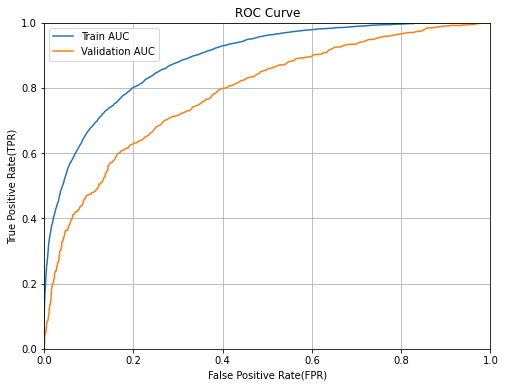

In [34]:

plt.figure(figsize=(8,6))
plt.plot(x[0],x[1],label='Train AUC')
plt.plot(y[0],y[1],label='Validation AUC')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.grid()